## P2 - Investigae a Data Set - Final Project

### Introduction:

#####  * Data Set  - Titanic.csv

#####  * Submission - Jupyter Notebook

This data analysis project is done using the data file downloaded from Udacity namely Titanic.csv, the data contains demographics and passenger information from 891 of the 2224 passengers and crew on board the RMS Titanic.

In this project, we try to analyse the factors which made people more likely to survive in the Titanic Disaster, also, as mentioned in the project description we analyze atleast one dependent variable and three independent variables.

Note: I have chosen to investigate Titanic dataset rather than Baseball database. As, this is my first Data Analysis project, I have chosen to keep the process simple and easier to understand.

### Data Description:

The data description mentioned below is sourced from Kaggle Website.

|Variable |	 Definition                                   | Key  
|---------|-----------------------------------------------|------------------------------------------------
|survival |	 Survival 	                                  | 0 = No, 1 = Yes
|pclass   |  Ticket class                                 | 1 = 1st, 2 = 2nd, 3 = 3rd
|sex      |  Sex 	                                      |
|Age 	  |  Age in years 	                              |
|sibsp 	  |  # of siblings / spouses aboard the Titanic   |	
|parch 	  |  # of parents / children aboard the Titanic   |	
|ticket   |	 Ticket number 	                              |
|fare 	  |  Passenger fare 	                          |
|cabin 	  |  Cabin number 	                              |
|embarked |  Port of Embarkation 	                      | C = Cherbourg, Q = Queenstown, S = Southampton


##### * Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson

### Data Analysis Process - Question ??

Our main task is to find out the cause of **survivability**, that is the factors which influenced the 892 persons (as in Data provided) of the Titanic to survive the disaster.

Throughout this project, we try to find out the factors which influenced the chances of survivability of the 892 persons in the given data set.

Dependent Variable - **SURVIVED** 

Independent Varaible - **AGE** , **PCLASS** , **SEX** (Male/Female)

In order to answer the question, we go through the step by step process of DATA Analysis;[Added after Review 1]

* **Data Wrangling**
    - Data Acqusition: The data is acquired from the downloadable comma separated value (.csv) file Titanic.
    - Data Cleaning: In this process, I have dropped unwanted columns from my DataSet.
* **Data Exploration**
    - Building Intuition: Based on the acquired data, I look upon the factors which influenced the chances of survivability of the passengers on board the ship.
    - Finding Pattern's: In this process, I analyse the various factors which increased the chances of survival of the passengers onboard the ship and present graphical representations to confirm my findings.
* **Draw Conclusions**
    - Based on the graphical representations I conclude my findings on what factors influenced the passengers onboard the ship to survive.
* **Communicate**
    - I have added appropriate reasoning for each analysis decision, plots and code.

#### Sample DataSet - Titanic.csv

I have imported all the necessary modules such as Numpy, Pandas, Matplotlib and Seaborn. These modules are necessary to work around the data. Also, I have written code in which I read the downloaded data file (titanic-data.csv) and assign it to dataframe {df} and print out the first 5 and bottom 5 rows from the data frame.

In [1]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Using Python 2.7 as the default interpeter

C:\Users\Basha\Anaconda3\envs\py27\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Importing the Titanic Data into Pandas
filename = 'titanic-data.csv'
df = pd.read_csv(filename)
df.head() # Printing first 5 rows from the data set - Titanic.csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail() # Printing the last 5 rows from the data set - Titanic.csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Data Analysis Process - Data Wrangling

The Data Wrangling process consists of Data Acqusistion and Data Cleaning. Since, we already have acquired the data, we now proceed with the Data Cleaning process.

##### Data Cleaning:

**Data to clean**: We can process the data in many ways and since we need to find the factors which influenced the survivability rate, I will remove the following columns to clean up the data:

1. Name
2. Ticket No (Ticket)
3. Embarked
4. Cabin

After the data cleaning process, I check whether any column in my data frame consists of a NaN value, and if present I clean the particular column. 

In [4]:
# Dropping Name, Ticket, Emabarked and Cabin Columns
df = df.drop(['Name', 'Ticket', 'Embarked', 'Cabin'], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [5]:
# Finding any NaN values in the data set

''' Command throws Boolean values where the rows 
    which contains data is marked as False and 
    others as True.'''

df.isnull()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [6]:
# Finding the sum of the Missing values for all Columns

'''Since a few rows are maked as True 
   expecially in Column - Age, we find
   the sum of the missing rows'''

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [7]:
# Finding the number of females and males with the missing age values
missing_boolean = pd.isnull(df['Age'])

female_missing = df[missing_boolean]['Sex'] == 'female'
print "Female Missing:", female_missing.sum()

male_missing = df[missing_boolean]['Sex'] == 'male'
print "Male Missing:", male_missing.sum()

# Total Missing
print "Total Missing:", missing_boolean.sum()

Female Missing: 53
Male Missing: 124
Total Missing: 177


** Missing Values (NaN) in Age Column ** 

From the above information, we can notice that overall 177 persons does not have any age information provided in the data set.

#### Data Analysis Process - Data Exploration

##### Building Intuition:

Our main task is to find the survivability rate of different persons across different age groups and class in the given data set.

##### Finding Pattern's:

In [8]:
# The function below returns the total survived percentage in different classes.

def survival_rate(pclass, sex):
    total_pass = df.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    survived_sex = df.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float')
    total_survived_sex_percentage = (survived_sex / total_pass * 100).round(2)
    
    return total_survived_sex_percentage

# Get the actual numbers grouped by class, suvival and sex
class_survived_size = df.groupby(['Pclass','Survived','Sex']).size()
print class_survived_size

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64


In [9]:
# Printing different classes survivability rate in percentage:

# Using FOR Loop - Modified as per review

for pclass in [1, 2, 3]:
    for gender in ['female', 'male']:
        print 'Class {} - {} Survival Rate: {}%'.format(pclass, gender, survival_rate(pclass, gender))

#print 'Class 1 - Female Survival Rate:', survival_rate(1,'female'),'%'
#print 'Class 1 - Male Survival Rate:', survival_rate(1,'male'),'%'
#print '*******'
#print 'Class 2 - Female Survival Rate:', survival_rate(2,'female'),'%'
#print 'Class 2 - Male Survival Rate:', survival_rate(2,'male'),'%'
#print '*******'
#print 'Class 3 - Female Survival Rate:', survival_rate(3,'female'),'%'
#print 'Class 3 - Male Survival Rate:', survival_rate(3,'male'),'%'

Class 1 - female Survival Rate: 96.81%
Class 1 - male Survival Rate: 36.89%
Class 2 - female Survival Rate: 92.11%
Class 2 - male Survival Rate: 15.74%
Class 3 - female Survival Rate: 50.0%
Class 3 - male Survival Rate: 13.54%


**Output Conclusion** - From the above output, we can say that the chances of survivabilty of people from different classes differed.

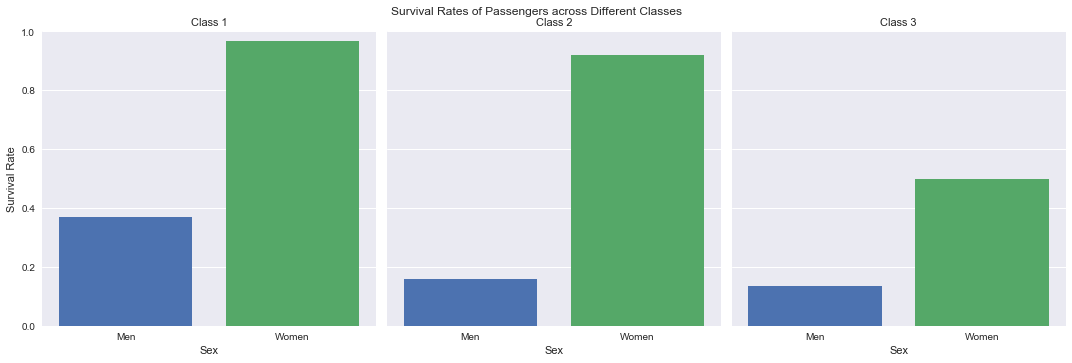

In [10]:
# Graphical Conclusions - 1
# For Survivability rate accordingly to Class

'''http://seaborn.pydata.org/generated/seaborn.factorplot.html?highlight=factorplot#seaborn.factorplot'''

graph1 = sns.factorplot(x = "Sex", y = "Survived", col = "Pclass", data = df, kind = 'bar',saturation=1, ci=None, size = 5)

# Setting up the labels

(graph1.set_axis_labels("Sex", "Survival Rate")
 .set_xticklabels(["Men", "Women"])
 .set_titles("Class {col_name}")
 .set(ylim=(0, 1))
 .despine(left=True))

plt.suptitle("Survival Rates of Passengers across Different Classes", y=1.0)

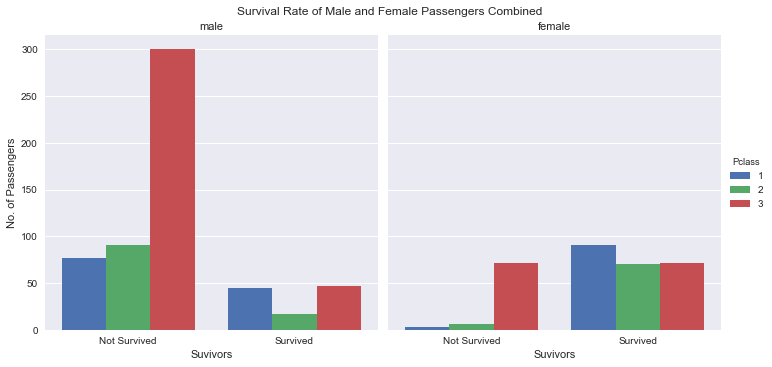

In [11]:
# Graphical Conclusions - 2
# For overall survivability comparision.

graph2 = sns.factorplot("Survived", col="Sex", hue = "Pclass", data=df, saturation=1, 
                        kind="count", ci=None, aspect=1.0, size = 5)

(graph2.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["Not Survived", "Survived"])
    .set_titles('{col_name}'))

plt.suptitle("Survival Rate of Male and Female Passengers Combined", y=1.01)

**Conclusion**: 

We can conclude that the survivability of people differed via each classes, while the women had survived equally in comparision with their men counterpart. Also, from the above graphical conclusions taken directly from the raw data, we can assume that the chances of survivability of people from __Class 1__ was higher than that of __Class 3__.

Class 1 - Female Survival Rate: 96.81 %
Class 1 - Male Survival Rate: 36.89 %
*******
Class 2 - Female Survival Rate: 92.11 %
Class 2 - Male Survival Rate: 15.74 %
*******
Class 3 - Female Survival Rate: 50.0 %
Class 3 - Male Survival Rate: 13.54 %

**Overall Surival**:

Class 1 - Both Men and Women: 66.85%

Class 2 - Both Men and Women: 53.93%

Class 3 - Both Men and Women: 31.77%

Thus, the passengers of Class 1 had higher chances of survival than the passengers of the other class. This gives raise to another questions which is did the passengers belonging to different ages were given preferences, for example, in the overall survival pecentage, how many youger, middle and older group people survived the disaster.

__We now look at the age factors of the passengers surviving the disater.__

In [12]:
# Dropping the rows which has NaN as age value

print "Male Missing:", male_missing.sum()

print "Female Missing:", female_missing.sum()

print "Total Missing:", missing_boolean.sum()

Male Missing: 124
Female Missing: 53
Total Missing: 177


In [13]:
df_age_clean = df.dropna() # Dropping the NaN Values and creating a new DataFrame

print "Age with NaN Values:", df_age_clean.isnull().sum()['Age'] # Checking wheather the rows doesn't have a NaN value

print "Total available rows:", df_age_clean.count() # DataFrame rows count

Age with NaN Values: 0
Total available rows: PassengerId    714
Survived       714
Pclass         714
Sex            714
Age            714
SibSp          714
Parch          714
Fare           714
dtype: int64


In [14]:
# Calcualtion Mean, STD and Count for Surived, Pclass and Age

df_calculations = df_age_clean.drop(['PassengerId', 'Fare', 'Parch', 'SibSp'], axis = 1)
df_calculations.describe()

,Survived,Pclass,Age
count,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118
std,0.491460,0.838250,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,1.000000,20.125000
50%,0.000000,2.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [15]:
# Total count of Passengers [ Survival and Deceased]

total_survived = df_age_clean[df_age_clean['Survived'] == True]['Survived'].count()
total_died = df_age_clean[df_age_clean['Survived'] == False]['Survived'].count()
print "Total Survived:", total_survived
print "Total Deceased:", total_died

# Mean of the Passengers Age [Survival and Deceased]

mean_survived = df_age_clean[df_age_clean['Survived'] == True]['Age'].mean()
mean_died = df_age_clean[df_age_clean['Survived'] == False]['Age'].mean()
print("Mean Survival Age: {0:.2f}".format(mean_survived))
print("Mean Deceased Age: {0:.2f}".format(mean_died))

# Young and Old [Survival and Deceased]

young_survival = df_age_clean[df_age_clean['Survived'] == True]['Age'].min()
young_die = df_age_clean[df_age_clean['Survived'] == False]['Age'].min()
old_survival = df_age_clean[df_age_clean['Survived'] == True]['Age'].max()
old_die = df_age_clean[df_age_clean['Survived'] == False]['Age'].max()
print "Young to Survive:", young_survival
print "Young to Die:", int(young_die)
print "Oldest to Survive:", int(old_survival)
print "Oldest to Die:", int(old_die)

Total Survived: 290
Total Deceased: 424
Mean Survival Age: 28.34
Mean Deceased Age: 30.63
Young to Survive: 0.42
Young to Die: 1
Oldest to Survive: 80
Oldest to Die: 74


In [16]:
# Plotting Graph 3:
# Overall Passenger Survival
# My Sample Data Frame

df_age_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


I have used the above dataframe to create a scatter plot which depicts the Overall Survival of Male and Female passengers on board the ship. The Scatter plot below interprets the survival of passengers among different ages.

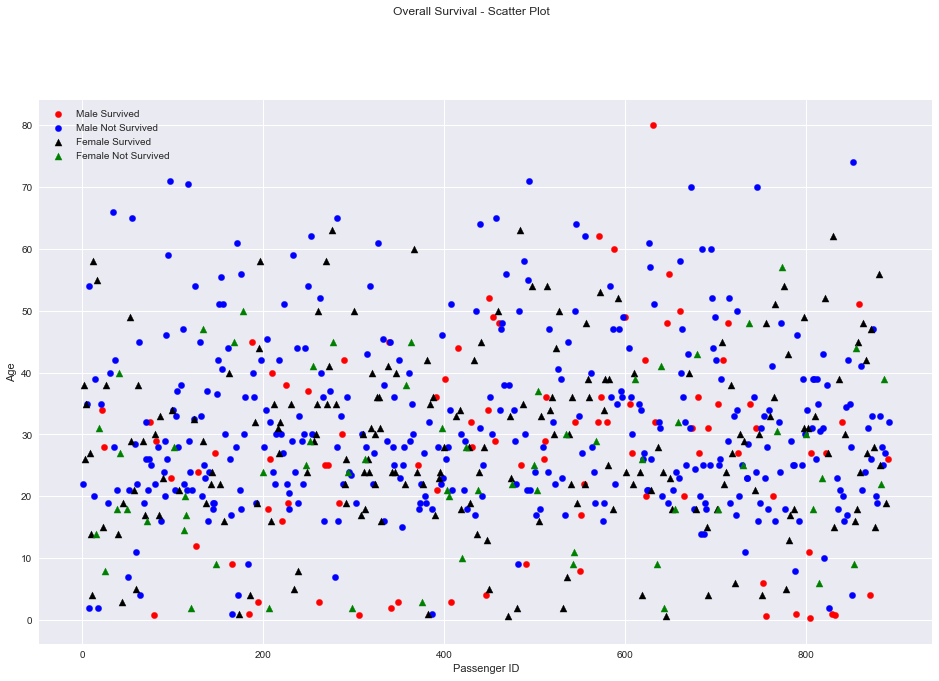

In [17]:
# Graph 4:
# Male and Female

def passenger_age(sex, survived):
    return df_age_clean[(df_age_clean['Sex'] == sex) & (df_age_clean['Survived'] == survived)]['Age']
def passenger_id(sex, survived):
    return df_age_clean[(df_age_clean['Sex'] == sex) & (df_age_clean['Survived'] == survived)]['PassengerId']

x1 = passenger_id('male', 1)     # Male ID Survived
y1 = passenger_age('male', 1)    # Male Age Survived
x2 = passenger_id('male', 0)     # Male ID Not Survived
y2 = passenger_age('male', 0)    # Male Age Not Survived
x3 = passenger_id('female', 1)   # Female Id Survived
y3 = passenger_age('female', 1)  # Female Age Survived
x4 = passenger_id('female', 0)   # Female Id Not Survived
y4 = passenger_age('female', 0)  # Female Age Not Survived

fig = plt.figure(figsize=(16, 10))
plot1 = plt.scatter(x1,y1,c='r',s=40)
plot2 = plt.scatter(x2,y2,c='b',s=40)
plot3 = plt.scatter(x3, y3,c ='black',s=50,marker='^')
plot4 = plt.scatter(x4,y4,c='g',s=50,marker='^')

plt.xlabel('Passenger ID')
plt.ylabel('Age')
plt.legend((plot1,plot2,plot3,plot4), ('Male Survived','Male Not Survived','Female Survived','Female Not Survived'), 
           loc='best')
plt.suptitle("Overall Survival - Scatter Plot", y=1.01)

plt.show()

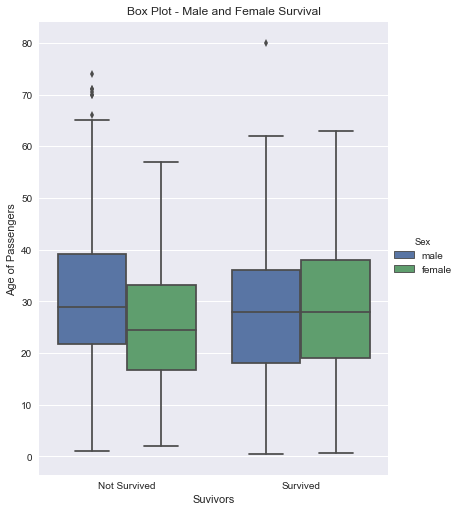

In [18]:
# Graph 5:
# Bar Graph for Better Understanding

graph5 = sns.factorplot(x="Survived", y="Age", hue='Sex', data=df_age_clean, kind="box", size=7, aspect=.8)

# Labels

(graph5.set_axis_labels('Suvivors', 'Age of Passengers').set_xticklabels(["Not Survived", "Survived"]))

plt.suptitle("Box Plot - Male and Female Survival", y=1.01)

**Conclusion**: 

From the above visual representaions, we can conclude that 'Age' was not a deciding factor in survivability of the passengers present on RMS Titanic. Our mean calculations didn't show any much difference.

We now further analyse, whether preferences were given to save any Childrens during the disaster. I assume that any passengers below the age of 17 as childred.

In [19]:
# We now categorise the Data to add Children [Below 16] Column.

pd.options.mode.chained_assignment = None

df_age_clean.loc[((df_age_clean['Sex'] == 'female') & (df_age_clean['Age'] >= 17) ),'Category'] = 'Women'

df_age_clean.loc[((df_age_clean['Sex'] == 'male') & (df_age_clean['Age'] >= 17) ), 'Category'] = 'Men'

df_age_clean.loc[(df_age_clean['Age'] < 17),'Category'] = 'Child'

print df_age_clean.groupby(['Category','Survived']).size()

Category  Survived
Child     0            45
          1            55
Men       0           331
          1            71
Women     0            48
          1           164
dtype: int64


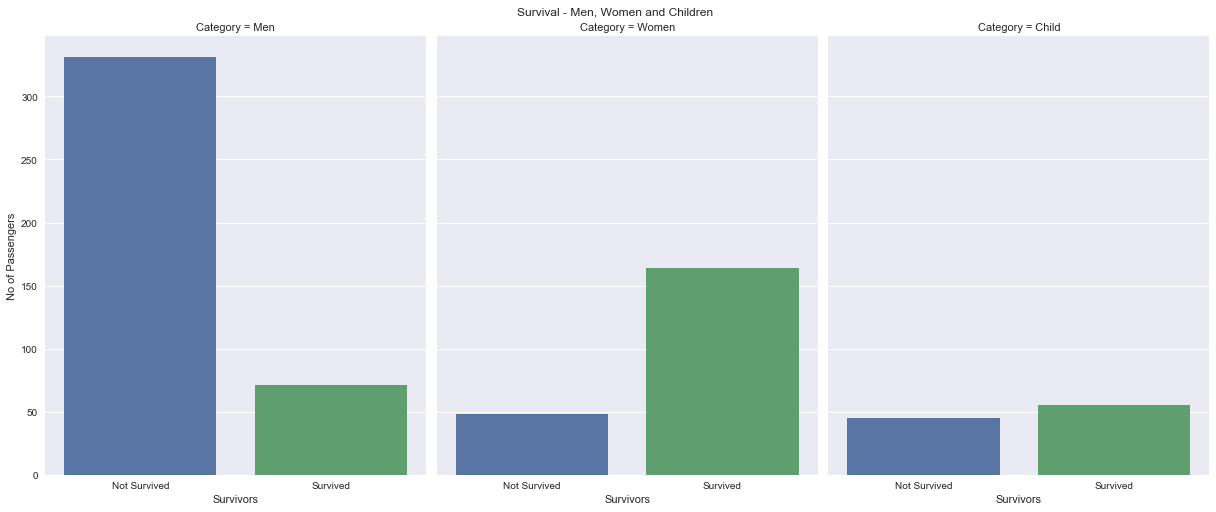

In [20]:
# Graph 6:
# Compare survival count between Men, Women and Children

graph6 = sns.factorplot('Survived', col='Category', data=df_age_clean, kind='count', size=7, aspect=.8)

(graph6.set_axis_labels("Survivors", "No of Passengers")
 .set_xticklabels(['Not Survived', 'Survived'])
 .despine(left=True)) 

plt.suptitle("Survival - Men, Women and Children", y=1.01)

### Final Conclusion:

After the analysis of the dataset - Titanic.csv, I can conclude the following:

* The Class factor influenced the survival of the Passengers onboard RMS TITANIC.


* Mostly, female passengers belonging to the First Class survived the most followed by the female passengers belonging to the  
  Second Class. The survival rate of the female passengers belonging to the Third Class was almost equivalent to the number  
  of female passengers to not survive.
  
  
* The male passengers belonging to the First Class had survived the most in comparision to the passengers of the Second and 
  Third Class. One should aslo note that although the number of male passengers to survive in both the first and third class   
  are almost the same, we can conclude that there were more number of male passengers who have not survived belonging to the 
  third class [77 not survived in First Class against 300 not survived in Third Class].
  
  
* Age was not a deciding factor in influencing the chances survivability of both the male and female passengers aboard the 
  RMS Titanic.
  
  
* From the above visualizations, we can also conclude that Childrens were given preference to the life boats/life jackets 
  which influenced their chances of survival.

__Limitation's__:

* I have ignored few rows in dataset in which the age column fields were missing (NaN). Also, in providing the graphical representations for the Children, I have assumed the Children's Age as > 16. These missing values and assumptions could have impacted my representations either positively or negatively.

__Further Research:__

* We can further reasearch the data as against the **parch** column to find out whether any preference was given to children who were accompanied by their parents, also we can use **sibsp** column to examine whether any preference were given to siblings.

__References:__

1 . http://seaborn.pydata.org/generated/seaborn.factorplot.html?highlight=factorplot#seaborn.factorplot

2 . https://www.codementor.io/sheena/python-generators-and-iterators-du1082iua

3 . https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

4 . https://github.com/pratyush19/Titanic-Machine-Learning-from-Disaster/blob/master/Solution.ipynb
